Aplikasikan GA untuk menentukan parameter fungsi alih sistem LTI orde 2,4, dan 6. Asumsikan parameter fungsi alih dalam orde 2,4,6, lalu simulasikan dengan input fungsi kotak sehingga diperoleh pasangan input output, yang digunakan untuk aplikasi GA menentukan parameter dari pasangan data input output tersebut.

Andhika Rahadian 13218030 <br>
Adeline Kartika 13218081

# Building Block of LTI System & Its I/O Signals

## Define DiscreteLTISystem Class

In [43]:
!pip install bitstring 

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import bitstring
import imageio
import tensorflow as tf

plt.style.use('seaborn')

""" 
    Asumsi sinyal input fungsi kotak adalah rectangular pulse kausal
"""
        
class DiscreteLTISystem:

    def __init__(self,n,x,zeros,poles,gain,dt=1,order=1):
        self.input_signal = x
        self.input_sample_boundary = n
        self.z = zeros
        self.p = poles
        self.k = gain
        self.dt = dt
        self.sys = signal.dlti(self.z,self.p,self.k,dt=self.dt)
        self.tf_order = order

    # Perform Excitation and Output Simulation of a Discrete LTI System
    # sys : system/transfer function, exc : excitation signal (input signal)
    def getTimeResponse(self):
        t, y_resp = signal.dlsim(self.sys, self.input_signal, t=self.input_sample_boundary)
        t = np.array(t)
        y = np.array(y_resp)

        return t,y
    
    # Plot Single Time Response
    def plotTimeResponse(self,ax,fig):

        t,y_resp = self.getTimeResponse()
        ax.scatter(self.input_sample_boundary,self.input_signal,c='red') # Plot Time Response
        ax.scatter(t,y_resp,c='green') # Plot Time Response
        ax.legend(['Excitation Signal', 'Time Response'])
        ax.grid(visible=True)
        ax.set_xlabel('samples(n)')
        ax.set_ylabel('Amplitude')
        ax.set_title('Causal Rectpulse Response (N=25), TF Order : {}'.format(self.tf_order))
        fig.show()
    
    
    def savePlotTimeResponse(self,t,y_iter,filename,generation):
        plt.clf()
        t,y_resp = self.getTimeResponse()
        plt.scatter(self.input_sample_boundary,self.input_signal,c='red') # Plot Time Response
        plt.scatter(t,y_resp,c='green') # Plot Time Response
        plt.scatter(t,y_iter,c='blue') # Plot Time Response - Iteration Genetic Algorithm
        plt.legend(['Excitation Signal', 'Objective Time Response', 'GA Time Response'])
        plt.grid(visible=True)
        plt.xlabel('samples(n)')
        plt.ylabel('Amplitude')
        plt.title('Causal Rectpulse Response (N=25), TF Order : {}\n Generation: {}'.format(self.tf_order,generation))
        plt.savefig('/content/drive/MyDrive/GeneticAlgorithm/Order' + str(self.tf_order) + '/' + filename)
    
    


## Define Input Excitation Discrete Signal (Causal Rectangular Pulse)

In [46]:
#============================= MAIN FUNCTION=====================
# Causal Rectangular Pulse Signal Definition
# zlti_rectpulse = signal.dlti([-1], [0], 1, dt=0.1)
len_samples = 50 # Batasan 50 Samples
n = np.asarray([float(i) for i in range(0,len_samples)])    
x = np.asarray([float(1) for i in range(0,len_samples//2)])
x = np.append(x,[float(0) for i in range(0,len_samples//2)])

## Define System by Discrete Transfer Function with certain zpk (Objective GA)

In [47]:
"""
    Simple Transfer Function

ans = 
         z
    -----------
       z-0.5
"""
# Example Discrete Time Transfer Function : z/(z-0.5) 
z = [0] # zeros
p = [0.5] # poles
k = 0.5 # gain

"""
    Second Order Transfer Function -> From MATLAB zpk(drss(n))
    isstable() -> yes

ans (tf) =
 
    0.1556 z + 0.07152
  -----------------------
  z^2 - 0.4106 z - 0.1274

ans(zpk) =
    0.15555 (z+0.4598)
  --------------------
  (z-0.617) (z+0.2064)
"""
# Second Order Discrete Time Transfer Function : z/(z-0.5) 
z2 = [-0.4598] # zeros
p2 = [0.617,-0.2064] # poles
k2 = 0.15555 # gain

"""
    Fourth Order Transfer Function -> From MATLAB zpk(drss(n))
    isstable() -> yes

ans = 
    -1.7708 (z+0.3911) (z-0.5292) (z-0.9092)
  --------------------------------------------
  (z+0.7228) (z-0.7818) (z-0.9186) (z-0.09443)

ans =
     -1.771 z^3 + 1.855 z^2 + 0.1442 z - 0.3332
  -------------------------------------------------
  z^4 - 1.072 z^3 - 0.4186 z^2 + 0.5673 z - 0.04902
"""
# Fourth Order Discrete Time Transfer Function
z4 = [-0.3911,0.5292,0.9092] # zeros
p4 = [-0.7228,0.7818,0.9186,0.09443] # poles
k4 = -1.7708 # gain

"""
    Sixth Order Transfer Function-> From MATLAB zpk(drss(n))
    isstable() -> yes
ans =
    
    0.34752 (z+1.302) (z+0.7948) (z+0.5189) (z+0.2745) (z+0.003167)
    -----------------------------------------------------------------
    (z-0.0265) (z+0.1964) (z+0.2981) (z+0.5202) (z+0.7534) (z+0.8481)

ans =
 
  0.3475 z^5 + 0.8147 z^4 + 0.4908 z^3 - 0.01435 z^2 - 0.05127 z - 0.0001622
  --------------------------------------------------------------------------
  z^6 + 2.59 z^5 + 2.51 z^4 + 1.116 z^3 + 0.2192 z^2 + 0.01282 z - 0.0005157
""" 
# Sixth Order Discrete Time Transfer Function 
z6 = [-1.302,-0.7948,-0.5189,0.2745,-0.003167] # zeros
p6 = [0.0265,-0.1964,-0.2981,-0.5202,-0.7534,-0.8481] # poles
k6 = 0.34752 # gain



## Validate & Plotting Discrete LTI System 

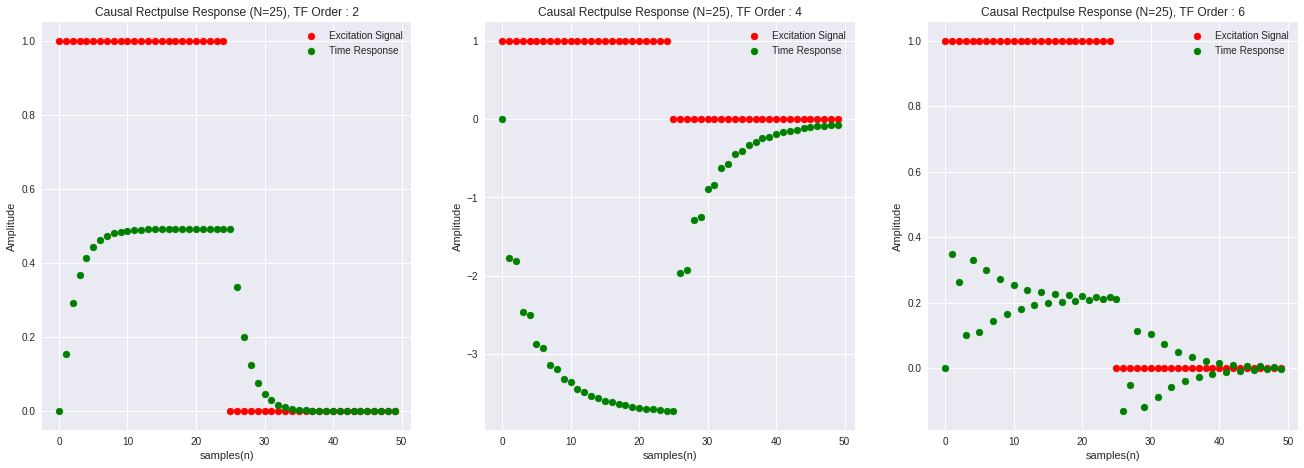

In [48]:
fig, ax = plt.subplots(1,3,figsize=(22.5,7.5))

# 2nd Order TF
dlti_2nd = DiscreteLTISystem(n,x,z2,p2,k2,dt=1,order=2)
t,y_2nd = dlti_2nd.getTimeResponse()
dlti_2nd.plotTimeResponse(ax[0],fig)

# 4nd Order TF
dlti_4th = DiscreteLTISystem(n,x,z4,p4,k4,dt=1,order=4)
t,y_4th = dlti_4th.getTimeResponse()
dlti_4th.plotTimeResponse(ax[1],fig)

# 6nd Order TF
dlti_6th = DiscreteLTISystem(n,x,z6,p6,k6,dt=1,order=6)
t,y_6th = dlti_6th.getTimeResponse()
dlti_6th.plotTimeResponse(ax[2],fig)

# Genetic Algorithm Design

In this part, we will perform Genetic Algorithm to Predict TF params from the desired Output Signal

## Objective Function Parsing from Transfer Function parameter (zero pole gain)

In [49]:

class TransferFuncParams:
    def __init__(self,z,p,k,order):
        self.z = z
        self.p = p
        self.k = k
        self.order = order

    # Convert Float Into Array of Bit
    def changeToBitString(self,num_float):
        return (bitstring.BitArray(float=num_float, length=32))

    def changeToFloat(self,bit_string):
        return (bitstring.BitArray(bit_string).float)

    # Convert Parameters Zero, Pole, and Gain To One Bit String
    def convertParamsToBitString(self,z,p,k):
        fz = 0
        fp = 0

        # Zeros
        for zero in z:
            fz += self.changeToBitString(zero)
        
        # Poles
        for pole in p:
            fp += self.changeToBitString(pole)
        
        # Gain
        fk = self.changeToBitString(k)

        return fz + fp + fk

    # Generate Objective From Second, Fourth, and Sixth Order
    def generateBitStringObjective(self):

        return self.convertParamsToBitString(self.z,self.p,self.k).bin
    
   
    def convertBitStringToParams(self,bit_string):
        nbit_float = 32
        nbit_bitstring = len(bit_string)
        parsed_bs = ['0b'+bit_string[i:i+nbit_float] for i in range(0,nbit_bitstring,nbit_float)]

        # Update ZPK
        self.z = [self.changeToFloat(parsed_bs[i]) for i in range(0,self.order-1)]
        self.p = [self.changeToFloat(parsed_bs[j+self.order-1]) for j in range(0,self.order)]
        self.k = self.changeToFloat(parsed_bs[-1])

        return self.z,self.p,self.k


TFParamOrder2 = TransferFuncParams(z2,p2,k2,2)
TFParamOrder4 = TransferFuncParams(z4,p4,k4,4)
TFParamOrder6 = TransferFuncParams(z6,p6,k6,6)
obj_2nd = TFParamOrder2.generateBitStringObjective()
obj_4th = TFParamOrder4.generateBitStringObjective()
obj_6th = TFParamOrder6.generateBitStringObjective()


# obj.test()
# Result
# 10111110111010110110101011101000
# 00111111000111011111001110110110
# 10111110010100110101101010000110
# 00111110000111110100100010000000

# 10111110110010000011111001000010
# 00111111000001110111100110100111
# 00111111011010001100000101010101
# 10111111001110010000100101101100
# 00111111010010000010010000001011
# 00111111011010110010100101011111
# 00111101110000010110010010000100
# 10111111111000101010100110010011

# 10111111101001101010011111110000
# 10111111010010110111100000000011
# 10111111000001001101011010100001
# 00111110100011001000101101000100
# 10111011010011111000110101110001
# 00111100110110010001011010000111
# 10111110010010010001110100010101
# 10111110100110001010000010010000
# 10111111000001010010101111010100
# 10111111010000001101111011010011
# 10111111010110010001110100010101
# 00111110101100011110111000100100


## Order 2

In [50]:
import random

class GeneticAlgorithm:
    # Genetic Algorithm Constructor

    def __init__(self, obj_func):
        self.objective = obj_func   # Objective function (bitstring of zpk)
        self.bestIndividual = ""    # Individual who has Least Fitness Value in every Population
        self.population_size = 100  # Indviduals size in each generation
        self.genes_candidate = '01' # Genes Candidate, either 0 or 1 (binary)


    def randomGen(self):
        # Create Random Gen (either 0 or 1)
        gen = random.choice(self.genes_candidate)
        return gen


    def createStringofGen(self):
        # Create String of Genes
        return [self.randomGen() for x in range(len(self.objective))]

    def reproduction(self, parent1, parent2):

        child = []      # Initialization of New Individual : Child
        for gen_par1, gen_par2 in zip(parent1, parent2): 
            prob = random.random()      # Random Probability 

            # prob < 0.40, Crossover from parent 1
            if prob < 0.40: 
                child.append(gen_par1)

            # 0.40 <= prob < 0.96, Crossover from parent 2
            elif prob < 0.96:
                child.append(gen_par2)

            # prob >= 0.96, Mutation
            else:
                child.append(self.randomGen())

        return child

            
    def fitnessEvaluation(self,strIter):
    # Calculate Fitness Score from Each String
        fitness = 0
        for gen_str, gen_obj in zip(strIter, self.objective):
            if gen_str != gen_obj: 
                fitness+= 1
        return fitness

    
    def execute(self):
        # Initialize Generation
        generation = 1

        # Population Initialization
        population = []
        for x in range(self.population_size):
            string = self.createStringofGen()
            population.append(string)

        # Best String every Generation
        iterString = []

        while True:
            # Population sorting based on fitness score
            population = sorted(population, key = lambda x:self.fitnessEvaluation(x))

            # Objective Reached (Fitness = 0)
            if self.fitnessEvaluation(population[0]) <= 0:
                break

            # Generate new child if fitness > 0
            new_generation = []

            # 10% of fittest population goes to the next generation
            n_top10percent = int((10*self.population_size)/100)
            new_generation.extend(population[:n_top10percent])

            # Create new Individual/child for other (outside 10% fittest)
            n_others = int((90*self.population_size)/100)
            for _ in range(n_others):
                parent1 = random.choice(population[:int(self.population_size/2)])
                parent2 = random.choice(population[:int(self.population_size/2)])
                child = self.reproduction(parent1,parent2)
                new_generation.append(child)

            # Best Individual, the least fitness
            self.bestIndividual = new_generation[0]

            # New Population
            population = new_generation

            # Output
            print("Generation: {}\nString: {}\nFitness: {}\n".\
                format(generation,"".join(population[0]),self.fitnessEvaluation(population[0])))
            
            # Increase Generation
            generation += 1

            # Every 1 generation, append to iterString for animation
            if (generation % 1) == 0:
                iterString.append(population[0])
        
        # Objective Output
        print("Generation: {}\nString: {}\nFitness: {}\n".\
            format(generation,"".join(population[0]),self.fitnessEvaluation(population[0])))
        iterString.append(population[0])

        return iterString
            
# Order2
ga = GeneticAlgorithm(obj_2nd)
iterString2 = ga.execute()


Generation: 1
String: 10000101100010010100001111011000101011100101000100100011111110001000101101001011010100111001010001110110100001010100100001011110
Fitness: 48

Generation: 2
String: 11101110101011110110101111101100101001000111111110011110010101100111110101011101100011111000011100111110010110111111111100110010
Fitness: 47

Generation: 3
String: 11101110101011110110101111101100101001000111111110011110010101100111110101011101100011111000011100111110010110111111111100110010
Fitness: 47

Generation: 4
String: 10101111011010110110101001001000100100110110011011100011101101110010111011010011110001101001011001011001010010111111001000110000
Fitness: 41

Generation: 5
String: 10101000011010110011111000001000000111110011010011110011010111100110011001011010100111101000111011111111110100110100000011000010
Fitness: 38

Generation: 6
String: 10111111010000010110101011001100111110110111010101101001011101101001101001011011010111101100110010111110100011000100100000010010
Fitness: 34

Generation: 7
St

In [51]:
len(iterString2)

51

[-1.2908339942782146e-35] [-4.755304483516909e-11, -3.915925506388637e-32] 1.3516469982888112e+33
[-2.7145173129962055e+28] [-5.5428426552557624e-17, 1.8406538977783336e+37] 0.21484068036079407
[-2.7145173129962055e+28] [-5.5428426552557624e-17, 1.8406538977783336e+37] 0.21484068036079407
[-2.1410884176731315e-10] [-2.914235339824129e-27, 9.630445052533076e-11] 3587856765288448.0
[-1.3058571422547988e-14] [3.831779124567507e-20, 2.5810017775189554e+23] nan
[-0.7555358409881592] [-1.2742517322725929e+36, -4.536471484306988e-23] -0.273987352848053
[-0.7555358409881592] [-1.2742517322725929e+36, -4.536471484306988e-23] -0.273987352848053
[-1.6820935073156348e-15] [0.04613610357046127, -7.182873740792745e+34] -0.003407984972000122
[-1.7098622119419461e-15] [-0.044183485209941864, -1.1547965975296675e-23] 0.003391895443201065
[-2.0909109946926074e-13] [7.922752047306858e-06, -6.741105770110557e+37] 5.79367182446382e+37
[-1.0876639866541638e-10] [-3.270151281330462e+36, -2.730726574536581e+3

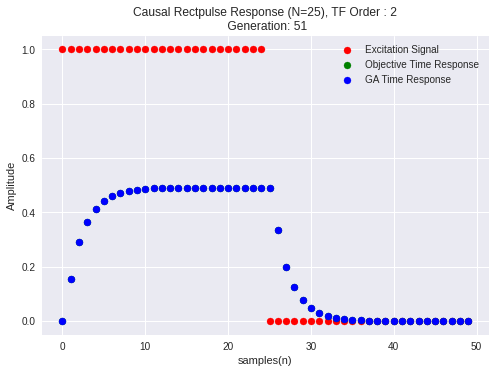

In [52]:
import os

dir = '/content/drive/MyDrive/GeneticAlgorithm/Order2/'
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

filenames = []
for i in range(len(iterString2)):
  TFParamOrder2 = TransferFuncParams(z2,p2,k2,2)
  bitstr = ""
  for bits in iterString2[i]:
      bitstr = bitstr+bits
  
  z_iter,p_iter,k_iter = TFParamOrder2.convertBitStringToParams(bitstr)
  print(z_iter,p_iter,k_iter)
  dlti_2nd = DiscreteLTISystem(n,x,z2,p2,k2,dt=1,order=2)
  dlti_buf = DiscreteLTISystem(n,x,z_iter,p_iter,k_iter,dt=1,order=2)
  t,y_iter = dlti_buf.getTimeResponse()
  filename = "{}.png".format(i+1)
  filenames.append(filename)
  dlti_2nd.savePlotTimeResponse(t,y_iter,filename,i+1)

images = []
# with imageio.get_writer('mygif.gif', mode='I') as writer:
for filename in filenames:
    image = imageio.imread('/content/drive/MyDrive/GeneticAlgorithm/Order2/' + filename)
    images.append(image)

imageio.mimsave('/content/drive/MyDrive/GeneticAlgorithm/Order2/TimeResponseGA.gif', images, duration=0.6) 

## Order 4


In [53]:
ga = GeneticAlgorithm(obj_4th)
iterString4 = ga.execute()

Generation: 1
String: 1110001011101101010100100111100001010100010001100011100111100001000101011110110010101101110001011010111111100010001110011011110000001100000111100101011001000010100101111101010101011111110000111110010100011101100111011101011000110101011110101110000110110010
Fitness: 110

Generation: 2
String: 1110111111111101011101100100110000010100010000100001100100101000000101011010010010111000000011001010101111110000101110011010110001001101010110100001011001101010100101111101010101000101010000111010011111000100110001000001011001011101111110101110010100100011
Fitness: 104

Generation: 3
String: 1010100011010011110111000100101111011110110000010111111100100011001010000100000011001101010100001101110101110000010001011000110011100110101001000000111100101001101111110111001001001110011000001001101011110111001010001011001110101100101000101100100011010011
Fitness: 103

Generation: 4
String: 101101001000100000111010110110100010100000001110111010001011011111000111010000110000010110010101100

In [54]:
len(iterString4)

868

[-2.1889104225887396e+21, 3405498286080.0, 9.559380087910871e-26] [-4.1150183260896256e-10, 1.2197834514782188e-31, -1.3788976037129593e-24, -4.652019355970193e+22] 9.346068736704183e-07
[-0.3831997811794281, 2.756637142355439e+33, -2.6585885790557997e-21] [-1.9455944299697876, 2.0124845052739074e-16, 1.4253745575842913e-05, 1.3200668336210697e-10] 1.3352535963058472
[-1.3307404550690602e+38, 0.5252947211265564, 2.116896241632915e-10] [-3.310240959739788e+38, 1.8202749030304943e-10, -0.9205836653709412, 0.5044634342193604] nan
[-0.0008399226935580373, 0.52920001745224, 0.9093239903450012] [-0.5978000164031982, 1.563599944114685, 0.9186000227928162, 0.09430792927742004] -1.7707998752593994
[-0.0030549936927855015, 0.52920001745224, 0.7842019200325012] [-0.7237766981124878, 0.7817999720573425, 0.9186000227928162, 0.09430792927742004] -1.770799994468689
[-0.0016498046461492777, 0.5291981101036072, 0.056825000792741776] [-0.7384250164031982, 0.8438155055046082, 0.9186000227928162, 0.094429

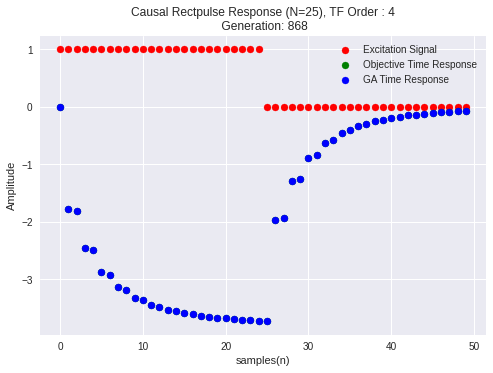

In [55]:
import os

dir = '/content/drive/MyDrive/GeneticAlgorithm/Order4/'
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

filenames = []
for i in range(len(iterString4)):
  if (i % 21 == 0) or (i == len(iterString4)-1):
    TFParamOrder4 = TransferFuncParams(z4,p4,k4,4)
    bitstr = ""
    for bits in iterString4[i]:
        bitstr = bitstr+bits
    
    z_iter,p_iter,k_iter = TFParamOrder4.convertBitStringToParams(bitstr)
    print(z_iter,p_iter,k_iter)
    dlti_4th = DiscreteLTISystem(n,x,z4,p4,k4,dt=1,order=4)
    dlti_buf = DiscreteLTISystem(n,x,z_iter,p_iter,k_iter,dt=1,order=4)
    t,y_iter = dlti_buf.getTimeResponse()
    filename = "{}.png".format(i+1)
    filenames.append(filename)
    dlti_4th.savePlotTimeResponse(t,y_iter,filename,i+1)

images = []
# with imageio.get_writer('mygif.gif', mode='I') as writer:
for filename in filenames:
    image = imageio.imread('/content/drive/MyDrive/GeneticAlgorithm/Order4/' + filename)
    images.append(image)

imageio.mimsave('/content/drive/MyDrive/GeneticAlgorithm/Order4/TimeResponseGA.gif', images, duration=0.6) 

In [56]:
ga = GeneticAlgorithm(obj_6th)
iterString6 = ga.execute()

Streaming output truncated to the last 5000 lines.
Generation: 5870
String: 101111111010011010100111111100001011111101001011011110000000001110111111000001001101011010100001001111101000110010001011010001001011101101001111100011010111000100111100110110010001011010000111101111100100100100011101000101011011111010011000101000001001000010111111000001010010101111010100101111110100000010011110110100111011111101011001000111010001010100111110101100011110111000100100
Fitness: 1

Generation: 5871
String: 101111111010011010100111111100001011111101001011011110000000001110111111000001001101011010100001001111101000110010001011010001001011101101001111100011010111000100111100110110010001011010000111101111100100100100011101000101011011111010011000101000001001000010111111000001010010101111010100101111110100000010011110110100111011111101011001000111010001010100111110101100011110111000100100
Fitness: 1

Generation: 5872
String: 10111111101001101010011111110000101111110100101101111000000000111011111100000100

In [57]:
len(iterString6)

7119

[-387662.78125, 5.814617409782841e-08, 1.7010670812178786e+24, 1.758806289447363e+27, -6.810064712002517e+30] [44423416.0, -1.0931098440632697e+34, 4.7813189461504434e-30, -3.210480275725458e-12, -0.019265223294496536, 8.619561909211121e+30] -3.8959835771077788e-22
[-1.3020000457763672, -0.7635824084281921, -0.6438999772071838, 0.2745000123977661, -0.00013690420018974692] [4.04365181339017e-07, -0.1964004784822464, -0.29871034622192383, -1.2293033258004016e-10, -0.7532779574394226, -0.8481001257896423] 0.36314499378204346


/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


[-1.3018784523010254, -0.7948018908500671, -0.5501500964164734, 0.2745000123977661, -0.003151741111651063] [0.02650001458823681, -0.1964000016450882, -0.298096239566803, -0.5202610492706299, -0.7573062777519226, -0.8481000065803528] 0.34751999378204346
[-1.986694405786693e-05, -0.7947999835014343, -0.5188999772071838, 0.2745000123977661, -7.374023809104957e-13] [0.02649904601275921, -0.1964000016450882, -0.42322206497192383, -0.5513280630111694, -0.7524234652519226, -0.8481000065803528] 0.34751999378204346
[-1.986694405786693e-05, -0.7948018908500671, -0.5188999772071838, 9.34075139385388e+37, -0.0031670595053583384] [0.026499999687075615, -0.1964000016450882, -0.29809999465942383, -0.5514500141143799, -0.7524234652519226, -0.8481000065803528] 0.34751999378204346
[-1.986694405786693e-05, -0.7948018908500671, -0.5188999772071838, 9.34075139385388e+37, -0.0031670595053583384] [0.026499999687075615, -0.1964000016450882, -0.29809999465942383, -0.5514500141143799, -0.7524234652519226, -0.84

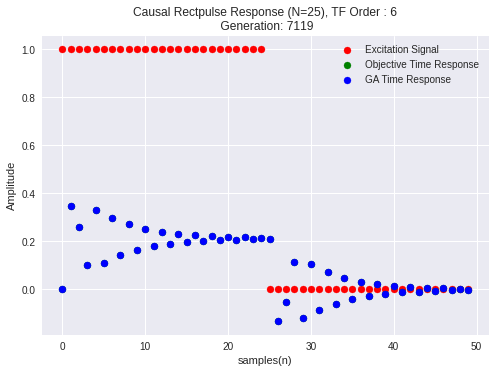

In [58]:
import os

dir = '/content/drive/MyDrive/GeneticAlgorithm/Order6/'
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

filenames = []
for i in range(len(iterString6)):
  if (i % 178 == 0) or (i == len(iterString6)-1):
    TFParamOrder6 = TransferFuncParams(z6,p6,k6,6)
    bitstr = ""
    for bits in iterString6[i]:
        bitstr = bitstr+bits
    
    z_iter,p_iter,k_iter = TFParamOrder6.convertBitStringToParams(bitstr)
    print(z_iter,p_iter,k_iter)
    dlti_6th = DiscreteLTISystem(n,x,z6,p6,k6,dt=1,order=6)
    dlti_buf = DiscreteLTISystem(n,x,z_iter,p_iter,k_iter,dt=1,order=6)
    t,y_iter = dlti_buf.getTimeResponse()
    filename = "{}.png".format(i+1)
    filenames.append(filename)
    dlti_6th.savePlotTimeResponse(t,y_iter,filename,i+1)

images = []
# with imageio.get_writer('mygif.gif', mode='I') as writer:
for filename in filenames:
    image = imageio.imread('/content/drive/MyDrive/GeneticAlgorithm/Order6/' + filename)
    images.append(image)

imageio.mimsave('/content/drive/MyDrive/GeneticAlgorithm/Order6/TimeResponseGA.gif', images, duration=0.6) 